In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of rigid_flows.density failed: Traceback (most recent call last):
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    update_instances(old, new)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 303, in update_instances
    ref.__class__ = new
  File "<string>", line 4, in __setattr__
dataclasses.FrozenInstanceError: canno

In [100]:
%set_env XLA_PYTHON_CLIENT_MEM_FRACTION=.5

env: XLA_PYTHON_CLIENT_MEM_FRACTION=.5


In [103]:
%load_ext autoreload 
%autoreload 2
import lenses

from flox.util import key_chain

from rigid_flows.flow import build_flow
from rigid_flows.specs import FlowSpecification, PreprocessingSpecification, CouplingSpecification, TransformerStackSpecification, ExperimentSpecification
from rigid_flows.density import PositionPrior

chain = key_chain(42)


specs = ExperimentSpecification.load_from_file("dummy.yaml")
# specs = lenses.bind(specs).model.flow.couplings.set(())

flow = build_flow(
    next(chain), specs.model.auxiliary_shape, specs.model.flow
)


from rigid_flows.data import Data

data = Data.from_specs(specs.system)

from rigid_flows.system import OpenMMEnergyModel
model = OpenMMEnergyModel.from_specs(specs.system)

from rigid_flows.density import TargetDensity, BaseDensity
density = TargetDensity(
    specs.model.auxiliary_shape,
    specs.system,
    model,
    data
)
prior = PositionPrior(data)

[autoreload of rigid_flows.density failed: Traceback (most recent call last):
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    update_instances(old, new)
  File "/home/jonas/miniconda3/envs/rigid-flows/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 303, in update_instances
    ref.__class__ = new
  File "<string>", line 4, in __setattr__
dataclasses.FrozenInstanceError: canno

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


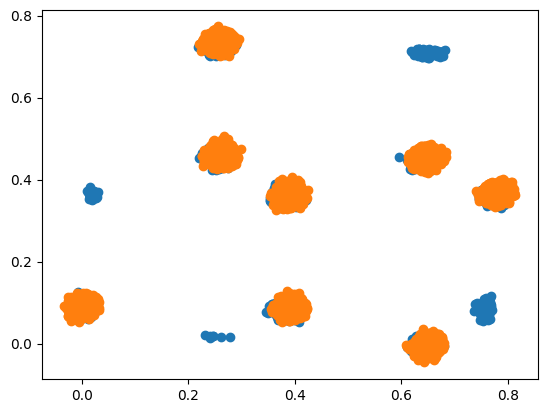

In [111]:
import jax
from matplotlib import pyplot as plt
import numpy as np


oxy = data.pos.reshape(-1, 16, 4, 3)[:, :, 0, :]

foo = jax.vmap(prior.sample)(
    seed=jax.random.split(next(chain), 1000)
).reshape(-1, 3)
plt.scatter(*np.array(oxy[:500, :, (1, 2)]).T)
plt.scatter(*np.array(foo[:, (1, 2)]).T)

In [5]:
# flow

In [6]:
import jax.numpy as jnp

asdf = base.sample(next(chain)).obj
fdsa = flow.inverse(asdf).obj
qwer = flow.forward(fdsa).obj

# qwer.com, fdsa.com
qwer.aux - asdf.aux # , qwer.pos

DeviceArray([[ 2.0302832e-07,  2.9802322e-08, -2.9802322e-08],
             [ 1.7881393e-07, -1.1920929e-07, -2.3841858e-07],
             [-1.7881393e-07,  2.3841858e-07, -2.3841858e-07],
             [-5.9604645e-08, -3.3620745e-07,  1.1920929e-07],
             [ 1.9371510e-07,  0.0000000e+00,  2.9802322e-08],
             [ 2.6822090e-07,  1.4901161e-07, -1.1920929e-07],
             [ 5.9604645e-08, -4.4703484e-08,  5.9604645e-08],
             [ 2.3841858e-07, -2.3841858e-07,  1.7881393e-07],
             [-1.1920929e-07,  0.0000000e+00, -1.1920929e-07],
             [-1.1920929e-07,  4.7683716e-07, -1.6391277e-07],
             [-2.0861626e-07,  7.8231096e-08,  1.7881393e-07],
             [ 1.1920929e-07,  0.0000000e+00,  7.4505806e-08],
             [-3.5762787e-07,  2.3841858e-07, -1.1920929e-07],
             [ 0.0000000e+00,  0.0000000e+00,  2.9802322e-08],
             [ 2.9802322e-07,  0.0000000e+00,  5.9604645e-08],
             [ 2.9802322e-07, -2.3841858e-07,  1.788139

In [7]:
inp = density.sample(next(chain)).obj
out = flow.forward(inp)
rec = flow.inverse(out.obj).obj

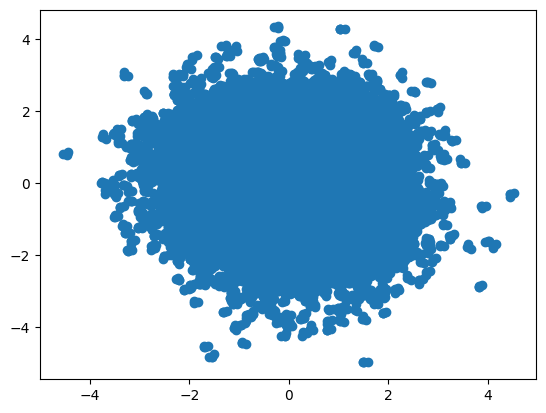

In [72]:
import numpy as np

v = np.load("./runs/2022-12-12_23:28:18/training_stage_0/epoch_1/samples.npz", allow_pickle=True)["obj"]

from matplotlib import pyplot as plt
x = np.frompyfunc(lambda d: d["pos"] + d["com"][:, None, None, :], 1, 1)(v)
# x = (x - x[:, 0, 0, :][:, None, None, :])
# plt.hist2d(x[..., 0].reshape(-1), x[..., 1].reshape(-1), bins=100);
plt.scatter(x[..., 0].reshape(-1), x[..., 1].reshape(-1))

In [3]:
# import jax / jnp

import jax
import jax.numpy as jnp

In [4]:
from flox.util import key_chain

# ensure consistent PRNG keys
chain = key_chain(42)

In [5]:
from jax import Array

# dataclasses that can be used as pytrees in vmap/tree_map etc.
from jax_dataclasses import pytree_dataclass


@pytree_dataclass(frozen=True)
class Box:
    """
    Simulation box.

    Args:
        max: maximum corner of the box
        min: minimum corner of the box
            defaults to (0, 0, 0)
    """

    max: jnp.ndarray
    min: jnp.ndarray = jnp.zeros(3)

    @property
    def size(self):
        return self.max - self.min

@pytree_dataclass
class State:
    """
    State being passed through the flow.
    
    Args:
        rot: quaternion describing current rotation
        pos: 3D vector describing current position
        ics: internal DoF of the system
        aux: auxiliary state
        box: simulation box
    """

    rot: Array
    pos: Array
    ics: tuple[Array, ...]
    aux: Array
    box: Box

### Neural Networks used for the flows

In [6]:
from functools import partial

# nn library
import equinox as eqx

# typing information
from jaxtyping import Float, Array  # type: ignore

from flox._src.nn.modules import dense
from flox.flow import Transformed

# purely functional handling of dataclasses
import lenses

KeyArray = jnp.ndarray | jax.random.PRNGKeyArray

class QuatEncoder(eqx.Module):
    """Encodes a quaternion into a flip-invariant representation."""
    encoder: eqx.nn.Linear

    def __init__(self, num_out: int, *, key: KeyArray):
        """Encodes a quaternion into a flip-invariant representation.

        Args:
            num_out (int): number of dimensions of output representation.
            key (KeyArray): PRNG Key for layer initialization
        """
        self.encoder = eqx.nn.Linear(4, num_out + 1, key=key)

    def __call__(self, quat: Float[Array, "... num_mols 4"]) -> Float[Array, "... num_mols 4"]:
        inp = jnp.stack([quat, -quat])
        out = jax.vmap(jax.vmap(self.encoder))(inp)
        weight = jax.nn.softmax(out[..., 0], axis=0)
        return (weight[..., None] * out[..., 1:]).sum(axis=0)


class Transformer(eqx.Module):
    """Standard impl of a transformer according to the `attention is all you need` paper."""

    attention_1: eqx.nn.MultiheadAttention
    attention_2: eqx.nn.MultiheadAttention

    norm_1: eqx.nn.LayerNorm
    norm_2: eqx.nn.LayerNorm
    norm_3: eqx.nn.LayerNorm

    dense: eqx.nn.Sequential

    def __init__(self, num_heads: int, num_dims: int, num_hidden: int, *, key: KeyArray):
        """Standard impl of a transformer according to the `attention is all you need` paper."

        Args:
            num_heads (int): number of transformer heads
            num_dims (int): node dimensionality
            num_hidden (int): hidden dimension of final dense layer
            key (KeyArray): PRNG Key for layer initialization
        """

        self.attention_1 = eqx.nn.MultiheadAttention(
            num_heads,
            num_dims * num_heads,
            use_key_bias=True,
            use_query_bias=False,
            use_output_bias=True,
            key=next(chain)
        )

        self.attention_2 = eqx.nn.MultiheadAttention(
            num_heads,
            num_dims * num_heads,
            use_key_bias=True,
            use_query_bias=False,
            use_output_bias=True,
            key=next(chain)
        )

        self.norm_1 = eqx.nn.LayerNorm(
            shape=(num_dims * num_heads),
            elementwise_affine=True)

        self.norm_2 = eqx.nn.LayerNorm(
            shape=(num_dims * num_heads),
            elementwise_affine=True)

        self.norm_3 = eqx.nn.LayerNorm(
            shape=(num_dims * num_heads),
            elementwise_affine=True)

        self.dense = dense(
            (num_dims * num_heads, num_hidden, num_dims * num_heads),
            jax.nn.silu,
            key=next(chain)
        )

    def __call__(self, input: Float[Array, "... seq_len node_dim"]) -> Float[Array, "... seq_len node_dim"]:

        input += self.attention_1(input, input, input)
        input = jax.vmap(self.norm_1)(input)

        input += self.attention_2(input, input, input)
        input = jax.vmap(self.norm_2)(input)

        input += jax.vmap(self.dense)(input)
        input = jax.vmap(self.norm_3)(input)

        return input        


class TransformerStack(eqx.Module):
    """Stack of transformer layers.

       DISCLAIMER: right now only implements a simple dense net!!!!
    """

    encoder: eqx.nn.Linear
    decoder: eqx.nn.Linear

    transformers: tuple[Transformer]

    # use simple dense net for now as transformers don't work (yet)
    foo: eqx.nn.Sequential

    def __init__(self, num_inp: int, num_out: int, num_heads: int, num_dims: int, num_hidden: int, num_blocks: int=0, *, key: KeyArray):
        chain = key_chain(key)
        self.encoder = eqx.nn.Linear(num_inp, num_heads * num_dims, key=next(chain))
        self.transformers = tuple(
            Transformer(num_heads, num_dims, num_hidden, key=next(chain))
            for _ in range(num_blocks)
        )
        self.decoder = eqx.nn.Linear(num_heads * num_dims, num_out, key=next(chain))


        self.foo = eqx.nn.Sequential([
            eqx.nn.Linear(num_inp * 16, num_hidden, key=next(chain)),
            eqx.nn.LayerNorm((num_hidden,), elementwise_affine=True),
            eqx.nn.Lambda(jax.nn.leaky_relu),
            # eqx.nn.Linear(num_hidden, num_hidden, key=next(chain)),
            # eqx.nn.LayerNorm((num_hidden,), elementwise_affine=True),
            # eqx.nn.Lambda(jax.nn.silu),
            eqx.nn.Linear(num_hidden, num_out * 16, key=next(chain)),
        ])

    def __call__(self, input: Float[Array, "... seq_len node_dim"]) -> Float[Array, "... seq_len node_dim"]:
        return self.foo(input.reshape(-1)).reshape(input.shape[0], -1)
        input = jax.vmap(self.encoder)(input)
        for transformer in self.transformers:
            input = transformer(input)
        
        return jax.vmap(self.decoder)(input)



### Flow layers

In [7]:
from functools import partial
from flox.flow import DoubleMoebius, Affine, Pipe, VectorizedTransform
from flox.util import unpack
from flox import geom

def affine_quat_fwd(q, A):
    A = jnp.eye(4) + A.reshape(4, 4)
    q_ = geom.unit(A @ q)
    ldj = jnp.linalg.slogdet(A)[1] - 4 * jnp.log(geom.norm(q_))
    return q_, ldj

def affine_quat_inv(q, A):
    A = jnp.eye(4) + A.reshape(4, 4)
    A = jnp.linalg.inv(A)
    q_ = geom.unit(A @ q)
    ldj = jnp.linalg.slogdet(A)[1] - 4 * jnp.log(geom.norm(q_))
    return q_, ldj


@pytree_dataclass
class QuaternionAffine:

    M: Array

    def forward(self, input: Array):
        new, ldj = affine_quat_fwd(input, self.M)
        return Transformed(new, ldj)

    def inverse(self, input: Array):
        new, ldj = affine_quat_inv(input, self.M)
        return Transformed(new, ldj)


def affine_forward(p, params):
    m, t = jnp.split(params, (9,), axis=0)
    m = m.reshape(3, 3) + jnp.eye(3)
    p = m @ p + t
    ldj = jnp.log(jnp.abs(geom.det3x3(m)))
    return p, ldj

def affine_inverse(p, params):
    m, t = jnp.split(params, (9,), axis=0)
    m = m.reshape(3, 3) + jnp.eye(3)
    p = jnp.linalg.inv(m) @ (p - t)
    ldj = -jnp.log(jnp.abs(geom.det3x3(m)))
    return p, ldj


@pytree_dataclass
class FullAffine:

    params: Array

    def forward(self, input: Array):
        p, ldj = affine_forward(input, self.params)
        return Transformed(p, ldj)

    def inverse(self, input: Array):
        p, ldj = affine_inverse(input, self.params)
        return Transformed(p, ldj)


class QuatUpdate(eqx.Module):
    """Flow layer updating the quaternion part of a state"""

    net: TransformerStack

    def __init__(
        self,
        num_aux: int,
        num_pos: int = 3,
        num_rot: int = 4,
        num_heads: int = 4,
        num_dims: int = 64,
        num_hidden: int = 64,
        *, 
        key: KeyArray,
    ):
        """Flow layer updating the quaternion part of a state.

        Args:
            num_aux (int): number of auxiliaries used
            num_pos (int, optional): number of position DoF. Defaults to 3.
            num_rot (int, optional): number of quaternion DoF. Defaults to 4.
            num_heads (int, optional): number of transformer heads. Defaults to 4.
            num_dims (int, optional): node dimension within the transformer stack. Defaults to 64.
            num_hidden (int, optional): hidden dim of transformer. Defaults to 64.
            key (KeyArray): PRNGKey for param initialization
        """
        self.net = TransformerStack(
            num_inp=num_aux + num_pos,
            num_out=4 * 4 + 4,# num_rot,
            num_heads=num_heads,
            num_dims=num_dims,
            num_hidden=num_hidden,
            key=key
        )

    def params(self, input: State):
        """Compute the parameters for the double moebius transform

        Args:
            input (State): current state

        Returns:
            Array: the parameter (reflection) of the double moebius transform
        """
        feats = jnp.concatenate([
            input.aux,
            input.pos
        ], axis=-1)
        out = self.net(feats)

        mat, reflection = jnp.split(out, (16,), -1)
        mat = mat * 1e-1

        reflection = reflection.reshape(input.rot.shape)
        reflection = jax.vmap(
            lambda x: x / (1 + geom.norm(x)) * 0.9999
        )(reflection)
        
        return mat, reflection

    def forward(self, input: State) -> Transformed[State]:
        """Forward transform"""
        mat, reflection = self.params(input)
        new, ldj = unpack(Pipe([
            VectorizedTransform(QuaternionAffine(mat)),
            VectorizedTransform(DoubleMoebius(reflection))
        ]).forward(input.rot))
        return Transformed(
            lenses.bind(input).rot.set(new),
            ldj
        )

    def inverse(self, input: State) -> Transformed[State]:
        """Inverse transform"""
        mat, reflection = self.params(input)
        new, ldj = unpack(Pipe([
            VectorizedTransform(QuaternionAffine(mat)),
            VectorizedTransform(DoubleMoebius(reflection))
        ]).inverse(input.rot))
        return Transformed(
            lenses.bind(input).rot.set(new),
            ldj
        )

class AuxUpdate(eqx.Module):
    """Flow layer updating the auxiliary part of a state"""

    symmetrizer: QuatEncoder
    net: TransformerStack

    def __init__(
        self,
        num_aux: int,
        num_pos: int = 3,
        num_rot: int = 4,
        num_heads: int = 4,
        num_dims: int = 64,
        num_hidden: int = 64,
        *, 
        key: KeyArray,
    ):
        """Flow layer updating the auxiliary part of a state.

        Args:
            num_aux (int): number of auxiliaries used
            num_pos (int, optional): number of position DoF. Defaults to 3.
            num_rot (int, optional): number of quaternion DoF. Defaults to 4.
            num_heads (int, optional): number of transformer heads. Defaults to 4.
            num_dims (int, optional): node dimension within the transformer stack. Defaults to 64.
            num_hidden (int, optional): hidden dim of transformer. Defaults to 64.
            key (KeyArray): PRNGKey for param initialization
        """
        chain = key_chain(key)
        self.symmetrizer = QuatEncoder(num_dims, key=next(chain))
        self.net = TransformerStack(
            num_inp=num_dims + num_pos,
            num_out=2 * num_aux,
            num_heads=num_heads,
            num_dims=num_dims,
            num_hidden=num_hidden,
            key=next(chain)
        )

    def params(self, input: State) -> tuple[Array, Array]:
        """Compute the parameters for the affine transform

        Args:
            input (State): current state

        Returns:
            tuple[Array, Array]: the parameters (shift, scale) of the affine transform
        """
        feats = jnp.concatenate([
            input.pos,
            self.symmetrizer(input.rot)
        ], axis=-1)
        out = self.net(feats)
        out = out.reshape(input.aux.shape[0], -1)
        shift, scale = jnp.split(out, 2, axis=-1)
        scale = scale * 1e-1
        return shift, scale

    def forward(self, input: State) -> Transformed[State]:
        """Forward transform"""
        shift, scale = self.params(input)
        new, ldj = unpack(Affine(shift, scale).forward(input.aux))
        return Transformed(
            lenses.bind(input).aux.set(new),
            ldj
        )

    def inverse(self, input: State) -> Transformed[State]:
        """Inverse transform"""
        shift, scale = self.params(input)
        new, ldj = unpack(Affine(shift, scale).inverse(input.aux))
        return Transformed(
            lenses.bind(input).aux.set(new),
            ldj
        )


class PosUpdate(eqx.Module):
    """Flow layer updating the position part of a state"""

    symmetrizer: QuatEncoder
    net: TransformerStack

    def __init__(
        self,
        num_aux: int,
        num_pos: int = 3,
        num_rot: int = 4,
        num_heads: int = 4,
        num_dims: int = 64,
        num_hidden: int = 64,
        *, 
        key: KeyArray,
    ):
        """Flow layer updating the position part of a state.

        Args:
            num_aux (int): number of auxiliaries used
            num_pos (int, optional): number of position DoF. Defaults to 3.
            num_rot (int, optional): number of quaternion DoF. Defaults to 4.
            num_heads (int, optional): number of transformer heads. Defaults to 4.
            num_dims (int, optional): node dimension within the transformer stack. Defaults to 64.
            num_hidden (int, optional): hidden dim of transformer. Defaults to 64.
            key (KeyArray): PRNGKey for param initialization
        """
        chain = key_chain(key)
        self.symmetrizer = QuatEncoder(num_dims, key=next(chain))
        self.net = TransformerStack(
            num_inp=num_dims + num_aux,
            num_out=12,#2 * num_pos,
            num_heads=num_heads,
            num_dims=num_dims,
            num_hidden=num_hidden,
            key=next(chain)
        )

    def params(self, input: State):# -> tuple[Array, Array]:
        """Compute the parameters for the affine transform

        Args:
            input (State): current state

        Returns:
            tuple[Array, Array]: the parameters (shift, scale) of the affine transform
        """
        feats = jnp.concatenate([
            input.aux,
            self.symmetrizer(input.rot)
        ], axis=-1)
        out = self.net(feats)
        out = out.reshape(input.pos.shape[0], -1)
        return out * 1e-2
        shift, scale = jnp.split(out, 2, axis=-1)
        scale = scale
        return shift, scale

    def forward(self, input: State) -> Transformed[State]:
        """Forward transform"""
        # shift, scale = self.params(input)
        # new, ldj = unpack(Affine(shift, scale).forward(input.pos))
        params = self.params(input)
        new, ldj = unpack(VectorizedTransform(FullAffine(params)).forward(input.pos))
        return Transformed(
            lenses.bind(input).pos.set(new),
            ldj
        )

    def inverse(self, input: State) -> Transformed[State]:
        """Inverse transform"""
        # shift, scale = self.params(input)
        # new, ldj = unpack(Affine(shift, scale).inverse(input.pos))
        params = self.params(input)
        new, ldj = unpack(VectorizedTransform(FullAffine(params)).inverse(input.pos))
        return Transformed(
            lenses.bind(input).pos.set(new),
            ldj
        )


class DisplacementEncoder(eqx.Module):
    """Encodes initial positions within the PBC box into
       displacement vectors relative to centers
       which are predicted from auxiliaries
    """

    symmetrizer: QuatEncoder
    net: TransformerStack

    def __init__(
        self,
        num_aux: int,
        num_pos: int = 3,
        num_rot: int = 4,
        num_heads: int = 4,
        num_dims: int = 64,
        num_hidden: int = 64,
        *, 
        key: KeyArray,
    ):
        """Encodes initial positions within the PBC box into
        displacement vectors relative to centers
        which are predicted from auxiliaries

        Args:
            num_aux (int): number of auxiliaries used
            num_pos (int, optional): number of position DoF. Defaults to 3.
            num_rot (int, optional): number of quaternion DoF. Defaults to 4.
            num_heads (int, optional): number of transformer heads. Defaults to 4.
            num_dims (int, optional): node dimension within the transformer stack. Defaults to 64.
            num_hidden (int, optional): hidden dim of transformer. Defaults to 64.
            key (KeyArray): PRNGKey for param initialization
        """
        chain = key_chain(key)
        self.symmetrizer = QuatEncoder(num_dims, key=next(chain))
        self.net = TransformerStack(
            num_inp=num_aux + num_dims,
            num_out=num_pos,
            num_heads=num_heads,
            num_dims=num_dims,
            num_hidden=num_hidden,
            key=next(chain)
        )

    def params(self, input: State) -> Array:
        """Compute the parameters (centers) given the input state

        Args:
            input (State): current state

        Returns:
            Array: the centers relative to which displacements are computed
        """
        feats = jnp.concatenate([
            input.aux,
            self.symmetrizer(input.rot)
        ], axis=-1)
        out = self.net(feats)
        center = out.reshape(input.pos.shape)
        center = jax.nn.sigmoid(center) * input.box.size
        return center

    def forward(self, input: State) -> Transformed[State]:
        """Forward transform"""
        center = self.params(input)
        diff = geom.Torus(input.box.size).tangent(center, input.pos - center)
        ldj = jnp.zeros(())
        return Transformed(
            lenses.bind(input).pos.set(diff), ldj
        )

    def inverse(self, input: State) -> Transformed[State]:
        """Inverse transform"""
        center = self.params(input)
        ldj = jnp.zeros(())
        pos = geom.Torus(input.box.size).shift(center, input.pos)    
        return Transformed(
            lenses.bind(input).pos.set(pos), ldj
        )

### priors

In [8]:
# a lot of useful standard densities implemented in JAX
import tensorflow_probability.substrates.jax as tfp  # type: ignore

# number
NUM_MOLECULES = 16
NUM_AUXILIARIES = 3

# params of the rotation prior (VMF)
base_rot_means = jnp.tile(jnp.array([1., 0., 0., 0.])[None], (NUM_MOLECULES, 1))
base_rot_concentration = jnp.ones((NUM_MOLECULES,)) * 40

# params of the auxilary prior (normal)
base_aux_means = jnp.zeros((NUM_MOLECULES, NUM_AUXILIARIES))
base_aux_stds = jnp.ones((NUM_MOLECULES, NUM_AUXILIARIES))

# params of the position / displacement prior (normal)
base_pos_means = jnp.zeros((NUM_MOLECULES, 3))
base_pos_stds = jnp.ones((NUM_MOLECULES, 3))

rot_sampler = tfp.distributions.VonMisesFisher(
        base_rot_means, base_rot_concentration
    )
pos_sampler = tfp.distributions.Normal(
    base_pos_means, base_pos_stds
)
aux_sampler = tfp.distributions.Normal(
    base_aux_means, base_aux_stds
)

def base_sampler(key: KeyArray, box: Box) -> Transformed[State]:
    """Samples from the base density

    Args:
        key (KeyArray): PRNG Key
        box (Box): simulation box

    Returns:
        Transformed[State]: a state sampled from the prior density
    """
    chain = key_chain(key)
    
    rot = rot_sampler.sample(seed=next(chain))
    rot = rot * jnp.sign(jax.random.normal(next(chain), shape=(rot.shape[0], 1)))
    pos = pos_sampler.sample(seed=next(chain))
    ics = (jnp.full(shape=(pos.shape[0],), fill_value=0.09572),
           jnp.full(shape=(pos.shape[0],), fill_value=0.09572),
           jnp.full(shape=(pos.shape[0],), fill_value=1.824218))
    aux = aux_sampler.sample(seed=next(chain))
    state = State(rot, pos, ics, aux, box)
    log_prob = base_density(state)
    return Transformed(state, log_prob)


def base_density(inp: State) -> Array:
    """Evaluate the base density for a state

    Args:
        state (State): the state to be evaluated

    Returns:
        Array: the energy of the state
    """
    # symmetrize latent distribution over rotations
    rot_prob = jax.nn.logsumexp(
        jnp.stack([
            rot_sampler.log_prob(inp.rot),
            rot_sampler.log_prob(-inp.rot)
        ]),
        axis=0
    ).sum()
    pos_prob = pos_sampler.log_prob(inp.pos).sum()
    aux_prob = aux_sampler.log_prob(inp.aux).sum()
    return -(rot_prob + aux_prob + pos_prob)



### load data

In [57]:
import numpy as np
from data.water.watermodel import WaterModel

temp = 250
ice_type = 'XI'
n_waters = 16

# path = ''
path = '/group/ag_cmb/scratch/minvernizzi/so3-flow/ice_MDdata/'
info = f'ice{ice_type}_T{temp}_N{n_waters}'
model = WaterModel.load_from_json(f'{path}model-{info}.json')
raw = np.load(f'{path}MDtraj-{info}.npz')


import openmm
import openmm, openmm.app
from openmm import unit

from logging import getLogger

logger = getLogger("energy model")


def energy_model(model):
    integrator = openmm.LangevinMiddleIntegrator(temp*unit.kelvin, 1/unit.picosecond, 1*unit.femtosecond)
    if isinstance(model.system.getForces()[-1], (openmm.MonteCarloBarostat, openmm.MonteCarloAnisotropicBarostat, openmm.MonteCarloFlexibleBarostat)):
        model.system.getForces()[-1].setDefaultTemperature(temp)
    simulation = openmm.app.Simulation(model.topology, model.system, integrator)

    def _raw_eval(p: np.ndarray, b: np.ndarray):
        energy = np.zeros(())
        force = np.zeros_like(p)
        try:
            simulation.context.setPositions(p.reshape(-1, 3))
            if b.shape == (3,):
                b = np.diag(b)
            simulation.context.setPeriodicBoxVectors(*b)
            # simulation.context.computeVirtualSites()
            state = simulation.context.getState(getEnergy=True, getForces=True)
            energy = state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole)
            force = state.getForces(asNumpy=True).value_in_unit(unit.kilojoule_per_mole / unit.nanometer)
        except Exception as e:
            logger.warning(str(e))

        return np.array(energy, np.float32), force.astype(np.float32).reshape(p.shape)
        

    def wrapped_callback(pos: Array, box: Array):
        shape_specs = (
            jax.ShapedArray((), jnp.float32),
            jax.ShapedArray(pos.shape, jnp.float32)
        )
        return jax.pure_callback(
            _raw_eval, shape_specs, pos, box
        )

    def eval_fwd(pos: Array, box: Array):
        energy, force = wrapped_callback(pos, box)
        return energy, (force, box)

    def eval_bwd(res, g):
        force, box = res
        return -g * force, jnp.zeros_like(box)

    @jax.custom_vjp
    def eval(pos: Array, box: Array):
        return eval_fwd(pos, box)[0]

    eval.defvjp(eval_fwd, eval_bwd)

    return eval, wrapped_callback, _raw_eval


energy, wrapped_energy_model, raw_energy_model = energy_model(model)




In [58]:
def precompute_forces(wrapped_model, raw):
    forces = []
    pos = raw["pos"]
    print(pos.shape)
    box = raw["box"][0]
    for i in list(range(len(pos))):
        _, force = raw_energy_model(pos[i], box)
        forces.append(force)
    forces = jnp.array(forces)
    return forces

_forces = precompute_forces(wrapped_energy_model, raw)

(100000, 64, 3)


In [59]:



from jaxtyping import Float, Array  # type: ignore
from dataclasses import astuple
import flox

from flox.flow import Lambda, Transform
from flox._src.flow import rigid

Scalar = Float[Array, ""] | float
Vector3 = Float[Array, "... 3"]
Quaternion = Float[Array, "... 4"]
Auxiliary = Float[Array, f"... AUX"]

AtomRepresentation = Float[Array, "... MOL 4 3"]


@pytree_dataclass(frozen=True)
class Data:
    """Raw data format."""
    positions: jnp.ndarray
    box: jnp.ndarray
    energy: jnp.ndarray
    force: jnp.ndarray | None = None



data = Data(*map(jnp.array, raw.values()))
data = Data(
    *astuple(data)[:-1], _forces
)

@pytree_dataclass(frozen=True)
class AugmentedData:
    """Data augmented with auxilaries and quaternion signs."""
    pos: Array
    aux: Array
    sign: Array
    box: Box
    force: jnp.ndarray | None = None


@pytree_dataclass(frozen=True)
class InternalCoordinates:
    d_OH1: Scalar = jnp.array(0.09572)
    d_OH2: Scalar = jnp.array(0.09572)
    a_HOH: Scalar = jnp.array(104.52 * jnp.pi / 180)
    d_OM: Scalar = jnp.array(0.0125)
    a_OM: Scalar = jnp.array(52.259937 * jnp.pi / 180)


@pytree_dataclass(frozen=True)
class RigidRepresentation:
    rot: Quaternion
    pos: Vector3
    ics: InternalCoordinates = InternalCoordinates()


def to_rigid(pos: AtomRepresentation) -> Transformed[RigidRepresentation]:
    q, p, *_ = rigid.from_euclidean(pos[:3])
    ldj = rigid.from_euclidean_log_jacobian(pos[:3])
    return Transformed(RigidRepresentation(q, p), ldj)


def from_rigid(rp: RigidRepresentation) -> Transformed[AtomRepresentation]:
    r_OM = rp.ics.d_OM * jnp.array(
        [jnp.sin(rp.ics.a_OM), 0.0, jnp.cos(rp.ics.a_OM)]
    )
    r_OM = flox.geom.qrot3d(rp.rot, r_OM)
    pos = rigid.to_euclidean(rp.rot, rp.pos, *astuple(rp.ics)[:3])
    ldj = rigid.to_euclidean_log_jacobian(rp.rot, rp.pos, *astuple(rp.ics)[:3])
    pos = jnp.concatenate([pos, (pos[0] + r_OM)[None]], axis=0)
    return Transformed(pos, ldj)


class RigidTransform(Transform[AtomRepresentation, RigidRepresentation]):
    def forward(
        self, inp: AtomRepresentation
    ) -> Transformed[RigidRepresentation]:
        return to_rigid(inp)

    def inverse(
        self, inp: RigidRepresentation
    ) -> Transformed[AtomRepresentation]:
        return from_rigid(inp)

In [60]:
def cutoff_potential(
    potential,
    reference,
    threshold
):

    def approximate_potential(inp):
        return 0.5 * jnp.square(
            inp - reference
        ).sum()

    def eval_fwd(
        inp
    ):
        original, grad = jax.value_and_grad(potential)(inp)
        gnorm = jnp.sqrt(1e-12 + jnp.sum(jnp.square(grad)))

        approx, grad_approx = jax.value_and_grad(approximate_potential)(inp)
        gnorm_approx = jnp.sqrt(1e-12 + jnp.sum(jnp.square(grad_approx)))
        grad_approx = grad_approx / gnorm_approx * threshold

        out = jnp.where(
            gnorm > threshold, 
            approx,
            original
        )
        grad = jnp.where(
            gnorm > threshold,
            grad_approx,
            grad
        )
        return out, grad

    def eval_bwd(
        g_inp,
        g_out
    ):
        return g_out * g_inp,

    @jax.custom_vjp
    def eval(
        inp
    ):
        return eval_fwd(inp)[0]

    eval.defvjp(
        eval_fwd, eval_bwd
    )

    return eval

In [61]:
# reference = np.array(data.positions[0]).reshape(16, 4, 3)

def target_density(inp: AugmentedData, cutoff=True) -> Array:
    """Evaluate the target density for a state

    Args:
        state (State): the state to be evaluated

    Returns:
        Array: the energy of the state
        
    """
    aux_prob = aux_sampler.log_prob(inp.aux).sum()

    if cutoff:
        pot = cutoff_potential(
            lambda x: energy(x, inp.box.size),
            reference,
            1e5 * 16
        )(inp.pos)
    else:
        pot = energy(inp.pos, inp.box.size)

    return -aux_prob + pot#energy(inp.pos, inp.box.size)


### initial transform mapping (augmented) data into a flow state

In [62]:
from flox._src.flow import rigid, Transform

@pytree_dataclass(frozen=True)
class InitialTransform:
    """Initial transform, transforming data into a state."""

    def forward(self, input: AugmentedData) -> Transformed[State]:
        rigid, ldj = unpack(VectorizedTransform(RigidTransform()).forward(input.pos))
        rigid = lenses.bind(rigid).rot.set(rigid.rot * input.sign)
        state = State(
            rigid.rot,
            rigid.pos,
            rigid.ics,
            input.aux,
            input.box
        )
        return Transformed(state, ldj)

    def inverse(self, input: State) -> Transformed[AugmentedData]:
        rigid = jax.vmap(RigidRepresentation)(
            input.rot,
            input.pos
        )
        pos, ldj = unpack(VectorizedTransform(RigidTransform()).inverse(rigid))
        sign = jnp.sign(input.rot[:, (0,)])
        data = AugmentedData(pos, input.aux, sign, input.box)
        return Transformed(data, ldj)

### define target density

In [23]:
def _force_box_vector(box: Array) -> Array:
    """Helper function that ensures box vectors are indeed vectors
       and no diagonal matrices.

    Args:
        box (Array): box vector of shape (3,) or (3, 3)

    Raises:
        ValueError: error if the box shape is neither (3,) or (3,3)

    Returns:
        Array: the box vector in shape (3,)
    """
    if box.shape == (3, 3):
        return jnp.diag(box)
    elif box.shape == (3,):
        return box
    else:
        raise ValueError(f"Cannot handle box of shape {box.shape}")


def target_sampler(key: KeyArray) -> Transformed[AugmentedData]:
    """Samples from the target (data) distribution.

    Auxiliaries are drawn from a standard normal distribution.

    Quaternion signs are drawn from {-1, 1} uniformily random.

    Args:
        key (KeyArray): PRNG Key

    Returns:
        Transformed[AugmentedData]: Sample from the target distribution.
    """
    chain = key_chain(key)
    idx = jax.random.randint(next(chain), minval=0, maxval=len(data.positions), shape=())
    box = Box(_force_box_vector(data.box[idx]))
    pos = data.positions[idx].reshape(-1, 4, 3)
    if data.force is not None:
        force = data.force[idx]
    else:
        force = None
    aux = aux_sampler.sample(seed=next(chain))
    sign = jnp.sign(jax.random.normal(next(chain), shape=(NUM_MOLECULES, 1)))
    return Transformed(AugmentedData(pos, aux, sign, box, force), jnp.zeros(()))


### define flow

In [24]:
from typing import Any


def _preprocess(key: KeyArray, num_aux: int) -> Pipe[AugmentedData, State]:
    """The initial blocks handing:

     - mapping augmented data into a state
     - predicting position centers from the auxilaries
     - mapping positions into displacements relative to position centers

    Args:
        key (KeyArray): PRNG key
        num_aux (int): number of auxilaries

    Returns:
        Pipe[AugmentedData, State]: the initial transform
    """
    chain = key_chain(key)
    return Pipe[AugmentedData, State]([
        InitialTransform(),
        AuxUpdate(num_aux, num_hidden=1024, key=next(chain)),
        DisplacementEncoder(num_aux, num_hidden=1024, key=next(chain)),
    ])


def _coupling(key: KeyArray, num_aux: int) -> Pipe[State, State]:
    """Creates a coupling block consisting of:

     - an update to the auxilaries
     - an update to the quaterions
     - an update to the positions

    Args:
        key (KeyArray): PRNG Key
        num_aux (int): number of auxilaries

    Returns:
        Pipe[State, State]: the coupling block
    """
    chain = key_chain(key)
    return Pipe[State, State]([
        AuxUpdate(num_aux, num_hidden=1024, key=next(chain)),
        QuatUpdate(num_aux, num_hidden=1024, key=next(chain)),
        PosUpdate(num_aux, num_hidden=1024, key=next(chain)),
    ])


def _make_flow(key: KeyArray, num_aux: int, num_blocks: int=4) -> Pipe[AugmentedData, State]:
    """Creates the final flow composed of:

     - a preprocessing transformation
     - multiple coupling blokcks

    Args:
        key (KeyArray): PRNG key
        num_aux (int): number of auxilaries
        num_blocks (int, optional): number of coupling blocks. Defaults to 2.

    Returns:
        Pipe[AugmentedData, State]: the final flow
    """
    chain = key_chain(key)
    blocks: list[Transform[Any, Any]] = [_preprocess(next(chain), num_aux)]
    for _ in range(num_blocks):
        blocks.append(_coupling(next(chain), num_aux))
    blocks.append(AuxUpdate(num_aux, num_hidden=1024, key=next(chain)))
    return Pipe[AugmentedData, State](blocks)


flow = _make_flow(next(chain), NUM_AUXILIARIES)

### Ensure that the flow is indeed invertible

In [25]:
inp = target_sampler(next(chain)).obj
out = flow.forward(inp).obj
back = flow.inverse(out).obj
assert jnp.max(jnp.abs(back.pos % Box(_force_box_vector(data.box[0])).size - inp.pos % Box(_force_box_vector(data.box[0])).size)) < 1e-5

### Setup optimization and sampling

In [26]:
chain = key_chain(42)

import optax
from optax import GradientTransformation

steps = 3_000
n_stages = 4
lrs = [10 ** (-3 - i) for i in range(n_stages)]
total_steps = n_stages * steps

scheduler = optax.join_schedules(
    tuple(
        optax.cosine_decay_schedule(lr, steps, alpha=0.1)
        for lr in lrs
    ),
    (steps,) * (n_stages  - 1)
)

optim = optax.adam(scheduler)

flow = _make_flow(next(chain), NUM_AUXILIARIES)




In [27]:
# # sample data

# orig = jax.vmap(target_sampler)(jax.random.split(next(chain), NUM_SAMPLES))
# orig = lenses.bind(orig).obj.pos.set(orig.obj.pos)
# q_orig = jax.vmap(InitialTransform().forward)(orig.obj).obj.rot

In [28]:
from flox.flow import PullbackSampler, PushforwardSampler, bind, pure, Inverted

def sample_loss(
    key,
    flow,
    base_sampler,
    base_energy,
    target_sampler,
    target_energy,
    weights,
):
    chain = key_chain(key)

    def neg_log_likelihood(sample):
        latent = flow.forward(sample)
        nll = base_energy(latent.obj) - latent.ldj
        return nll


    def force_matching_loss(sample):
        nll_loss, model_force = jax.value_and_grad(neg_log_likelihood)(sample)
        # _, target_force = wrapped_energy_model(sample.pos, sample.box.size)
        target_force = sample.force

        # fm_loss = jnp.square(
        #     model_force.pos + target_force
        # ).sum()
        fm_loss = optax.huber_loss(
            model_force.pos.reshape(-1) + target_force.reshape(-1)
        ).sum()
        return fm_loss

    nll = weights[0] * neg_log_likelihood(target_sampler(next(chain)).obj)

    fm = weights[1] * force_matching_loss(target_sampler(next(chain)).obj)
    
    return nll + fm

def batch_loss(
    key,
    flow,
    base_sampler,
    base_energy,
    target_sampler,
    target_energy,
    weights,
    num_samples: int = 128
):
    keys = jax.random.split(key, num_samples)

    loss = jax.vmap(
        lambda key: sample_loss(
            key=key, 
            flow=flow, 
            base_sampler=base_sampler, 
            base_energy=base_energy, 
            target_sampler=target_sampler, 
            target_energy=target_energy,
            weights=weights,
        )
    )(keys)
    
    return jnp.mean(loss)


def make_update_step(
    optim,
    base_sampler,
    base_energy,
    target_sampler,
    target_energy,
    num_samples: int = 128,
):

    @eqx.filter_jit
    def step(key, flow, opt_state, weights):
        # param, static = eqx.partition(flow, eqx.is_array)  # type: ignore
        loss, grad = eqx.filter_value_and_grad(
            lambda flow: batch_loss(
                key=key,
                flow=flow,
                base_sampler=base_sampler,
                base_energy=base_energy,
                target_sampler=target_sampler,
                target_energy=energy,
                num_samples=num_samples,
                weights=weights,
            )
        )(flow)
        updates, opt_state = optim.update(grad, opt_state)
        flow = eqx.apply_updates(flow, updates)
        return loss, flow, opt_state
    
    return step

In [29]:
from flox._src.nn.train import free_energy_step, mle_step


params, static = eqx.partition(flow, eqx.is_array)  # type: ignore
# opt_state0 = optim0.init(params)

# step = free_energy_step(
#     base_density,
#     optim,
#     target_sampler,
#     num_samples=128
# )

opt_state = optim.init(params)

step = make_update_step(
    optim,
    partial(base_sampler, box=Box(_force_box_vector(data.box[0]))),
    base_density,
    target_sampler,
    target_density,
    num_samples=128,
)

In [35]:
NUM_ITERS = 10_000
PRINT_ITERS = 100
loss = np.full(NUM_ITERS//PRINT_ITERS, np.nan)

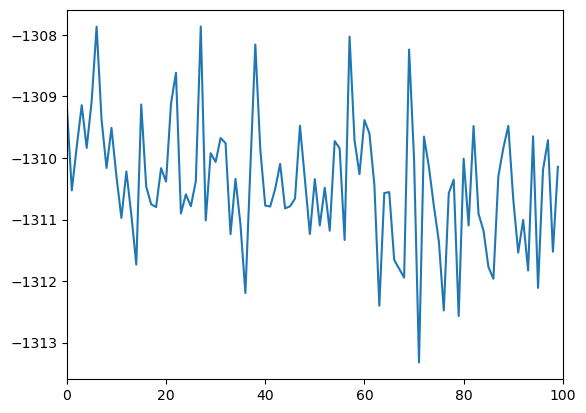

iter: 9999/10000, loss (ml): -1310.14
CPU times: user 5min 50s, sys: 11.6 s, total: 6min 1s
Wall time: 5min 37s


In [36]:
%%time
from matplotlib import pyplot as plt
from IPython.display import clear_output

for i in range(NUM_ITERS):
    loss[i//PRINT_ITERS], flow, opt_state = step(next(chain), flow, opt_state, weights=jnp.array([1., 0.]))  # type: ignore
    if (i + 1) % PRINT_ITERS == 0:
        clear_output(wait=True)
        plt.plot(loss)
        plt.xlim(0, len(loss))
        plt.show()
        print(f"iter: {i+1}/{NUM_ITERS}, loss (ml): {loss[i//PRINT_ITERS]:.6}")

### sample from data / model / prior

In [37]:
NUM_SAMPLES = 10_000

In [38]:
# sample data

orig = jax.vmap(target_sampler)(jax.random.split(next(chain), NUM_SAMPLES))
orig = lenses.bind(orig).obj.pos.set(orig.obj.pos)
q_orig = jax.vmap(InitialTransform().forward)(orig.obj).obj.rot

In [39]:
from ast import parse
from collections.abc import Iterable, Mapping
from dataclasses import dataclass, is_dataclass
from types import GenericAlias


@dataclass(frozen=True)
class A:
    a: list[list[int] | list[str]]

a = A([123])

issubclass(a.__dataclass_fields__["a"].type.__origin__, Iterable)
# issubclass(a.__dataclass_fields__["a"].type, Iterable)

def parse(typ, value):
    if is_dataclass(typ):
        return parse_data_class(typ, value)
    elif isinstance(typ, GenericAlias):
        return parse_generic_alias(typ, value)
    elif issubclass(typ, Mapping):
        return parse_mapping(Any, Any, value)
    elif issubclass(typ, Iterable):
        return parse_iterable(Any, value)
    else:
        return value

from itertools import repeat

def parse_iterable(value_types, values):
    assert isinstance(values, Iterable)
    if not isinstance(value_types, Iterable):
        return tuple(
            parse(value_types, val) for val in values
        )
    else:
        return tuple(
            parse(typ, val) for typ, val in zip(
                value_types,
                values,
                strict=True
            )
        )

def parse_data_class(clz, kwargs):
    assert is_dataclass(clz)
    assert isinstance(kwargs, dict)
    parsed_kwargs = {}
    for name, field in clz.__dataclass_fields__.items():
        if name in kwargs:
            value = parse(field.type, kwargs[name])
            parsed_kwargs[name] = value
    return clz(**parsed_kwargs)


def parse_mapping(key_type, value_type, value):
    assert isinstance(value, Mapping)
    return {
        k: parse(value_type, v)
        for k, v in value.items()
    }


def parse_generic_alias(
    alias, value
):
    origin = alias.__origin__
    args = alias.__args_
    if issubclass(origin, tuple):
        if len(args) == 1 or args[1] == ...:
            return parse_iterable(args[0], value)
        else:
            return parse_iterable(args, value)
    elif issubclass(origin, Iterable):
        return parse_iterable(args[0], value)
    elif issubclass(origin, Mapping):
        key_type, value_type = args
        parse_mapping(key_type, value_type, value)
    else:
        raise ValueError(f"Cannot parse generic alias {origin}")

In [41]:
# sample model

# sampling function (jit compiled)
sample_from_model = jax.jit(jax.vmap(
    PullbackSampler(partial(base_sampler, box=Box(_force_box_vector(data.box[0]))), flow)
))

samples = sample_from_model(jax.random.split(next(chain), NUM_SAMPLES))
q_samples = jax.vmap(InitialTransform().forward)(samples.obj).obj.rot

In [43]:
# sample prior

prior = jax.vmap(partial(base_sampler, box=Box(_force_box_vector(data.box[0]))))(jax.random.split(next(chain), NUM_SAMPLES))
q_prior = prior.obj.rot

### compare positions and rotations

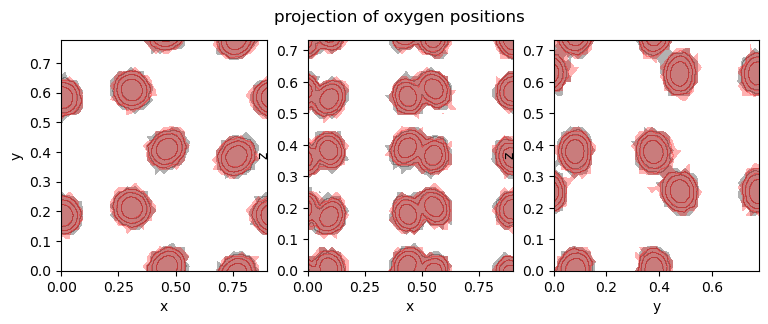

In [44]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import itertools as it

box = Box(_force_box_vector(data.box[0]))

def _compute_contour_levels(qi, qj, threshold: float = 1e-5, num_levels: int = 5, num_bins: int = 50) -> tuple[Array, ...]:
    h, *bins = jnp.histogram2d(
            qi,
            qj,
            density=True,
            bins=num_bins + 1
        )
    h = jnp.log(threshold + h)
    levels = jnp.linspace(
        h[h > jnp.log(1e-4)].min(),
        h.max(),
        num_levels
    )
    return h, levels, *bins

def _plot_contour_lines(p, box, dim_i, dim_j, colors: str):
    num_bins = 50
    gx, gy = jnp.meshgrid(
        jnp.linspace(box.min[dim_i], box.max[dim_i], num_bins + 1),
        jnp.linspace(box.min[dim_j], box.max[dim_j], num_bins + 1),
    )
    h, levels, *bins = _compute_contour_levels(
        p[:, :, 0, dim_i].reshape(-1) % box.size[dim_i],
        p[:, :, 0, dim_j].reshape(-1) % box.size[dim_j],
    )
    plt.contourf(gx, gy, h, levels, colors=colors, alpha=0.3, extend="neither", antialiased = False)


plt.figure(figsize=(3 * 3, 1 * 3))
plt.suptitle("projection of oxygen positions")
labels = ("x", "y", "z")
for k, (i, j) in enumerate(it.combinations(range(3), 2), start=1):
    
    plt.subplot(1, 3, k)
    _plot_contour_lines(
        samples.obj.pos,
        Box(_force_box_vector(data.box[0])),
        i, j,
        "black"
    )
    _plot_contour_lines(
        orig.obj.pos,
        Box(_force_box_vector(data.box[0])),
        i, j,
        "red"
    )
    plt.ylabel(labels[j])
    plt.xlabel(labels[i])   


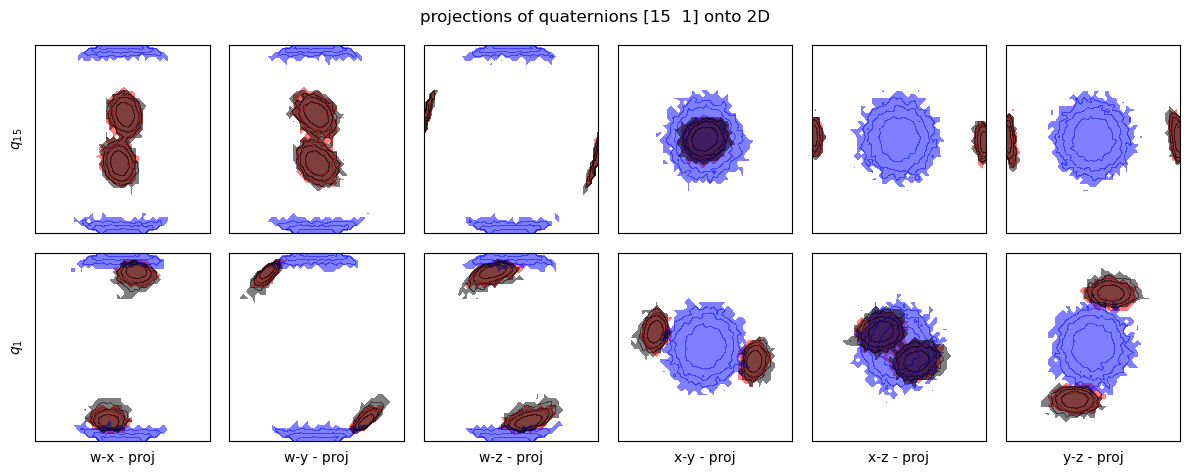

In [45]:
import itertools as it

from matplotlib import pyplot as plt

from matplotlib.colors import LogNorm

NUM_PLOTTED = 2
plt.figure(figsize=(6 * 2, NUM_PLOTTED * 2 + .8))

idx = np.random.randint(16, size=(NUM_PLOTTED,))

plt.suptitle(f"projections of quaternions {idx} onto 2D")

num_bins = 50
gx, gy = jnp.meshgrid(
    jnp.linspace(-1, 1, num_bins),
    jnp.linspace(-1, 1, num_bins)
)

def _compute_contour_levels(qi, qj, threshold: float = 1e-5, num_levels: int = 5, num_bins: int = 50) -> tuple[Array, Array]:
    h, *_ = jnp.histogram2d(
            qi,
            qj,
            density=True,
            bins=(jnp.linspace(-1, 1, num_bins + 1), jnp.linspace(-1, 1, num_bins + 1))  # type: ignore
        )
    h = jnp.log(threshold + h)
    levels = jnp.linspace(
        h[h > jnp.log(1e-4)].min(),
        h.max(),
        num_levels
    )
    return h, levels

def _plot_contour_lines(gx, gy, q, quat_idx, dim_i, dim_j, colors: str):
    h, levels = _compute_contour_levels(
        q[:, quat_idx, dim_i],
        q[:, quat_idx, dim_j]
    )
    plt.contourf(gx, gy, h, levels, colors=colors, alpha=0.5, extend="neither", antialiased = False)

labels = ["w", "x", "y", "z"]

n = 0
for i, (j, k) in it.product(idx, it.combinations(range(4), 2)):
    n = n + 1
    plt.subplot(NUM_PLOTTED, 6, n)

    _plot_contour_lines(
        gx, gy, q_orig, i, j, k, "red"
    )

    _plot_contour_lines(
        gx, gy, q_prior, i, j, k, "blue"
    )

    _plot_contour_lines(
        gx, gy, q_samples, i, j, k, "black"
    )

    if n % 6 == 1:
        plt.ylabel(f"$q_{{{i}}}$")

    if (6 * NUM_PLOTTED - n) < 6:
        plt.xlabel(f"{labels[j]}-{labels[k]} - proj")
    
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.tight_layout()

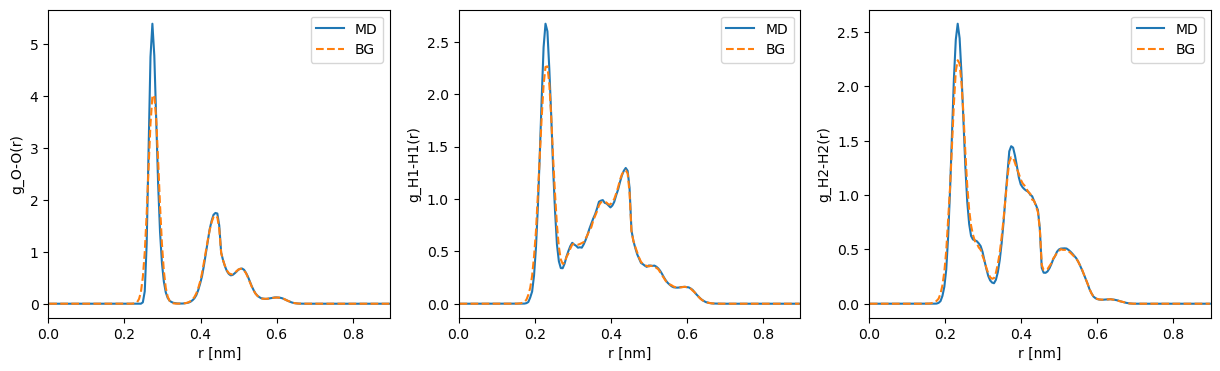

In [72]:
import mdtraj as md

r_range = [0, model.box.max()]
MDtraj = md.Trajectory(data.positions[:NUM_SAMPLES], model.mdtraj_topology)
MDtraj.unitcell_vectors = np.resize(model.box, (NUM_SAMPLES,3,3))
BGtraj = md.Trajectory(samples.obj.pos.reshape(NUM_SAMPLES, model.system.getNumParticles(), 3), model.mdtraj_topology)
BGtraj.unitcell_vectors = MDtraj.unitcell_vectors


names = ['O', 'H1', 'H2']
n = 1
plt.figure(figsize=(5*len(names), 4))
for a in names:
    plt.subplot(1, len(names), n)
    
    ij = model.mdtraj_topology.select_pairs(f'name == {a}', f'name == {a}')
    rdf = md.compute_rdf(MDtraj, ij, r_range=r_range)
    plt.plot(*rdf, label='MD')
    rdf = md.compute_rdf(BGtraj, ij, r_range=r_range)
    plt.plot(*rdf, ls='--', label='BG')
    
    plt.ylabel(f'g_{a}-{a}(r)')
    plt.xlabel('r [nm]')
    plt.xlim(r_range)
    plt.legend()
    n += 1
    
plt.show()

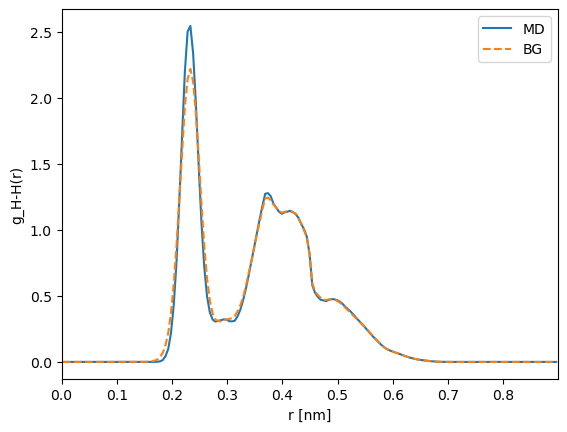

In [73]:
# ij = model.mdtraj_topology.select_pairs('True', 'True')
a = 'H'
ij = model.mdtraj_topology.select_pairs(f'symbol == {a}', f'symbol == {a}')
ij = ij[(ij[:,1]-ij[:,0]) > 1] #avoid same-molecule atoms
rdf = md.compute_rdf(MDtraj, ij, r_range=r_range)
plt.plot(*rdf, label='MD')
rdf = md.compute_rdf(BGtraj, ij, r_range=r_range)
plt.plot(*rdf, ls='--', label='BG')

plt.ylabel(f'g_{a}-{a}(r)')
plt.xlabel('r [nm]')
plt.xlim(r_range)
plt.legend()
plt.show()

### save to file

In [46]:
SAVE_DATA = False

In [47]:
if SAVE_DATA:
    import datetime
    stamp = datetime.datetime.now().strftime("%d_%m_%Y-%H_%M_%S")
    path = "/group/ag_cmb/jonkhler/experiments/rigids"
    file = f"samples_{stamp}.npz"
    np.savez(f"{path}/{file}", positions=np.array(samples.obj))

### compare energies

In [63]:
eval_target_density_ = jax.jit(jax.vmap(partial(target_density)))

In [64]:
from tqdm import tqdm


num_samples = 1_000_000
num_per_batch = 10_000


def gather_model_energies(
    key,
    base,
    flow,
    num_samples: int = 1_000_000,
    num_per_batch: int = 10_000,
):

    chain = key_chain(key)

    @jax.jit
    @jax.vmap
    def gather(key):
        latent, u_base = unpack(base(key))
        samples, ldj = unpack(flow.inverse(latent))
        u_tot = target_density(samples, cutoff=False)
        u_aux = -aux_sampler.log_prob(samples.aux).sum()
        return u_tot, u_aux, u_base, ldj
    
    us_target = []
    us_aux = []
    us_base = []
    ldjs = []

    num_sampled = 0
    while num_sampled < num_samples:
        u_target, u_aux, u_base, ldj = gather(jax.random.split(next(chain), num_per_batch))
        us_target.append(np.array(u_target))
        us_aux.append(np.array(u_aux))
        us_base.append(np.array(u_base))
        ldjs.append(np.array(ldj))
        num_sampled += len(u_target)
    
    us_target = np.concatenate(us_target)
    us_aux = np.concatenate(us_aux)
    us_base = np.concatenate(us_base)
    ldjs = np.concatenate(ldjs)

    return us_target, us_aux, us_base, ldjs

In [65]:
us_target, us_aux, us_base, ldjs = gather_model_energies(
    next(chain),
    partial(base_sampler, box=Box(_force_box_vector(data.box[0]))),
    flow,
    num_samples=100_000,
    num_per_batch=10_000
)

In [66]:
auxs = jax.vmap(aux_sampler.sample)(seed=jax.random.split(next(chain), 10_000))
auxs = -jax.vmap(aux_sampler.log_prob)(auxs).sum((-1, -2))

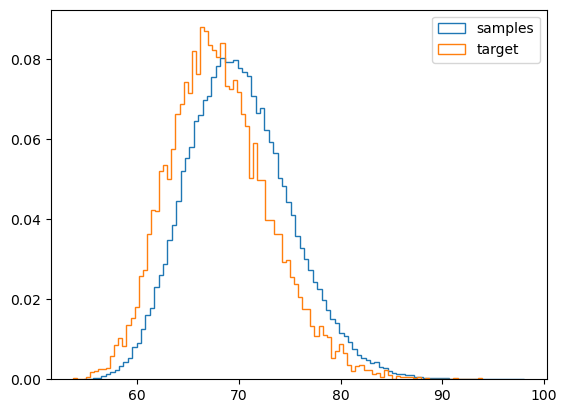

In [67]:
plt.hist(us_aux, density=True, bins=100, histtype="step", label="samples");
plt.hist(auxs, density=True, bins=100, histtype="step", label="target");
plt.legend()

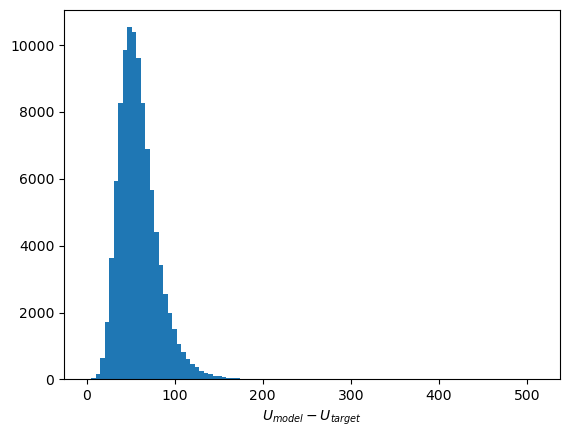

In [68]:
diffs = (us_target - us_base - ldjs) - jnp.min(us_target - us_base - ldjs)
diffs = diffs[diffs < 1e3]
plt.hist(
    diffs,
    bins=100,
);
plt.xlabel("$U_{model} - U_{target}$");

In [69]:
log_weights = jax.nn.log_softmax(-us_target + us_base + ldjs)
ess = 1. / jnp.sum(jnp.square(jnp.exp(log_weights))) / len(log_weights)
print(f"ess: {ess * len(log_weights):g}, i.e. {ess:.3%}")

ess: 3.3153, i.e. 0.003%


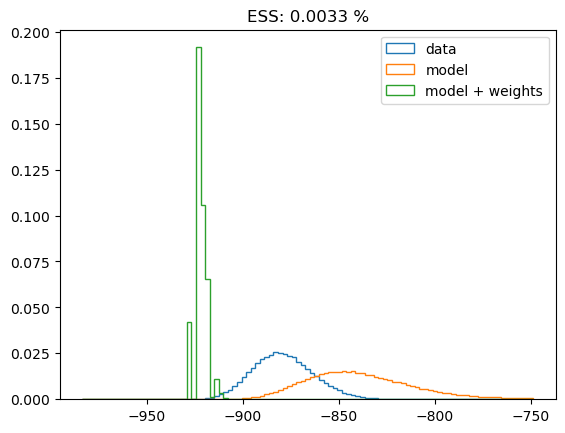

In [70]:
u_data = np.array(raw["ene"].reshape(-1))

bins = jnp.linspace(
    u_data.min() - 50, u_data.max() + 50, 100
)

plt.title(f"ESS: {ess * 100:.2} %")
plt.hist(u_data, bins=bins, histtype="step", density=True, label="data");
plt.hist(np.array(us_target - us_aux), bins=bins, histtype="step", density=True, label="model");
plt.hist(np.array(us_target - us_aux), bins=bins, histtype="step", weights=np.array(jnp.exp(log_weights)), density=True, label="model + weights");
plt.legend()
